In [ ]:
!mkdrir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: mkdrir: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats          #directly importing from kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

tensorflow is an open source end to end machine learning platform used for image processing and speech recognition

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_height, image_width = 224, 224
batch_size = 32


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size,
    image_size = (image_height, image_width)
)

Found 20000 files belonging to 2 classes.


In [ ]:
#validation
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size,
    image_size = (image_height, image_width)
)

Found 5000 files belonging to 2 classes.


In [ ]:
print(train_ds.class_names)

['cats', 'dogs']


<ipython-input-27-7f9afad7a9bd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,3,i+1)


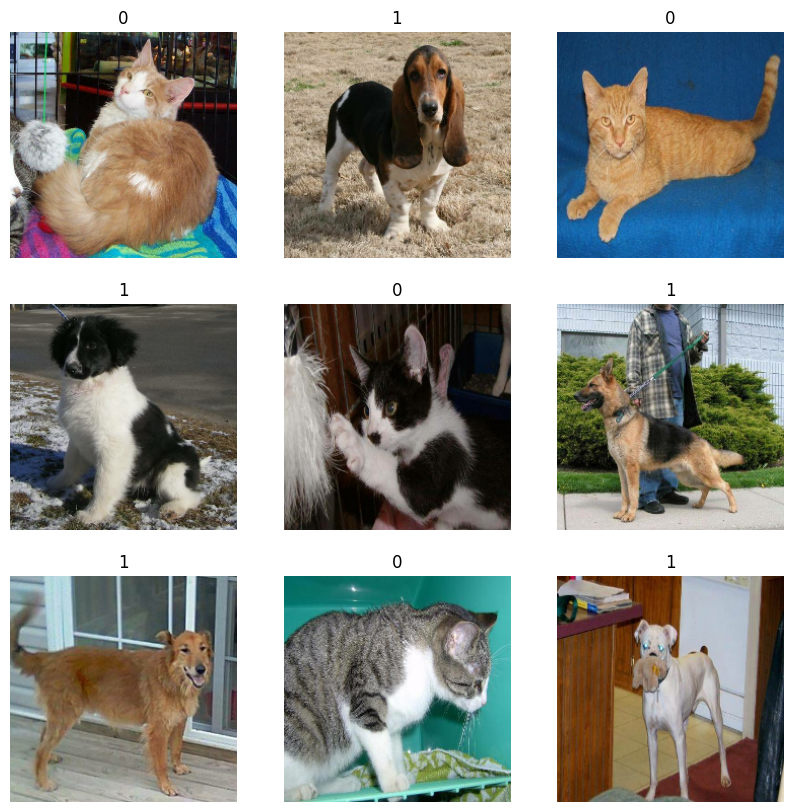

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

In [ ]:
#cnn model
model = Sequential()

model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=3, validation_data=validation_ds)

Epoch 1/3
625/625 [==============================] - 2376s 4s/step - loss: 0.5896 - accuracy: 0.6798 - val_loss: 0.4912 - val_accuracy: 0.7634
Epoch 2/3
625/625 [==============================] - 2312s 4s/step - loss: 0.4531 - accuracy: 0.7843 - val_loss: 0.4456 - val_accuracy: 0.7926
Epoch 3/3
625/625 [==============================] - 2280s 4s/step - loss: 0.3404 - accuracy: 0.8511 - val_loss: 0.4681 - val_accuracy: 0.8068


In [42]:
import os
os.mkdir('/content/Simple_CNN')
os.chdir('/kaggle/working/models')

FileExistsError: [Errno 17] File exists: '/content/Simple_CNN'

In [44]:
import os

# Check if the directory exists before creating it
if not os.path.exists('/content/Simple_CNN'):
    os.mkdir('/content/Simple_CNN')
    print("Directory '/content/Simple_CNN' created.")
else:
    print("Directory '/content/Simple_CNN' already exists.")



Directory '/content/Simple_CNN' already exists.


In [45]:
# prompt: continue the above code

model.save('/content/Simple_CNN/1')


157/157 [==============================] - 172s 1s/step - loss: 0.4681 - accuracy: 0.8068
Test loss: 0.4680728614330292
Test accuracy: 0.8068000078201294


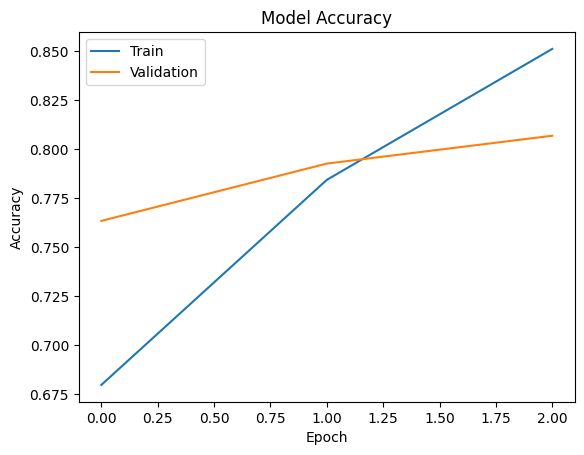

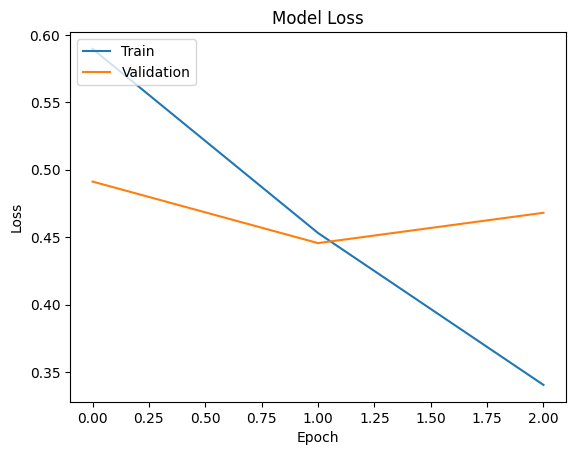

In [40]:
# prompt: continue the code

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(validation_ds)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# Visualize the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Visualize the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
